# Project Title : **Unveiling the Stress Landscape of Students – A Data Story**

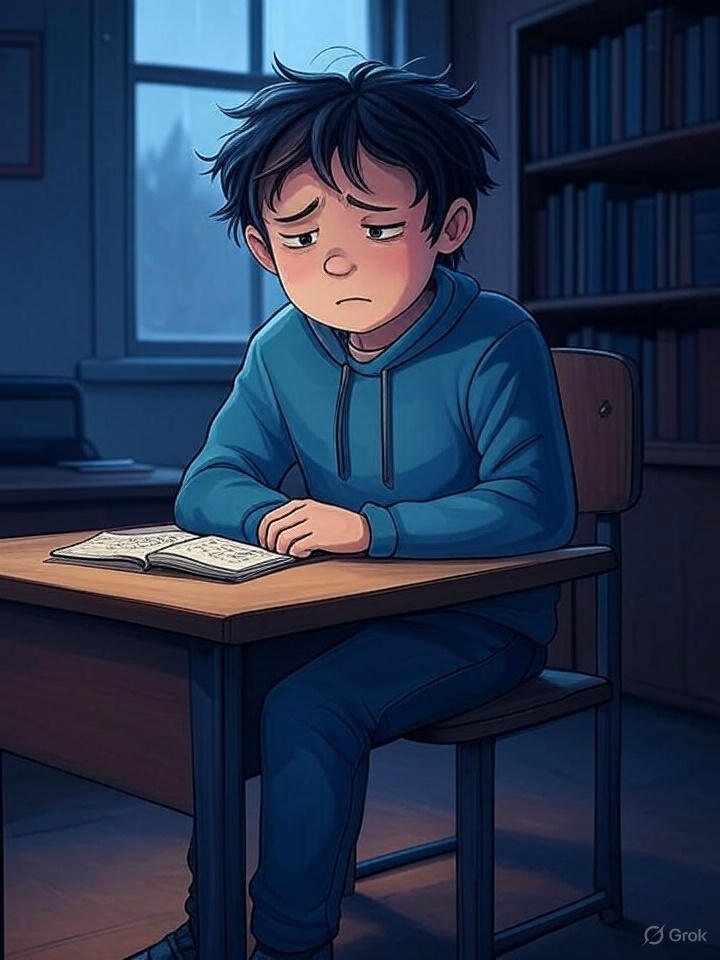

### **🎯 Objective**

### *The aim of this project is to uncover the key stress factors contributing to depression among students. Using real-world data and visual storytelling, this analysis offers deep insights into how academic pressure,financial stress, study satisfaction, and other dimensions impact students' mental health.*

### **🔍 Step-by-Step Storytelling & Explanation**

## Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## 1. Data Loading & Initial Inspection

## 📌Why:
### *Before diving into analysis, it’s essential to understand the structure, shape, and quality of the data.*

In [37]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\student_depression_dataset.csv")

In [38]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Data Info 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [40]:
df.shape

(27901, 18)

In [41]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## **💬 Interpretation:**

- **The dataset consists of various features such as Age, Gender, Academic Pressure, Study Satisfaction, Financial Stress, etc.**

- **The goal is to prepare and clean these fields for meaningful analysis.**

## 2. Data Cleaning & Transformation

## 📌Why:

### *Raw data often contains inconsistencies. For example, non-numeric values in numeric columns or missing/null values. Cleaning is crucial for accurate visualizations and interpretations.*

### Changning Data Type

In [42]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [43]:
# Check the unique values and dtype of the "Financial Stress" column before conversion
financial_stress_info = {
    "dtype_before": df["Financial Stress"].dtype,
    "unique_values": df["Financial Stress"].unique(),
    "nan_count": df["Financial Stress"].isna().sum()
}

financial_stress_info


{'dtype_before': dtype('O'),
 'unique_values': array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object),
 'nan_count': np.int64(0)}

In [44]:
# Step 1: Remove rows where 'Financial Stress' is '?'
df = df[df["Financial Stress"] != "?"].copy()

# Step 2: Convert the column to float, then to int
df["Financial Stress"] = df["Financial Stress"].astype(float).astype(int)

# Optional: Reset index
df.reset_index(drop=True, inplace=True)


In [45]:
df["Age"]=df["Age"].astype(int)
df["Academic Pressure"]=df["Academic Pressure"].astype(int)
df["Study Satisfaction"]=df["Study Satisfaction"].astype(int)
df["Work/Study Hours"]=df["Work/Study Hours"].astype(int)
df["Work Pressure"]=df["Work Pressure"].astype(int)


## **💬 Interpretation:**

- **"?" entries were removed to ensure numeric integrity.**

- **Columns were converted to integers to support mathematical operations and visual grouping.**

## Data Cleaning and Removing Column For Better Readability

 ###  **Dropping Redundant Columns**

## 📌Why:

### *Removing non-informative columns (like id) helps declutter the dataset and avoid unnecessary noise in the analysis.*

In [46]:
df.drop(columns=["id"],inplace=True)

###  Handling Null and Duplicate Values

In [47]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.head() 

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0.0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0.0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0.0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0.0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


## 📈 EDA & Interactive Visualization

## 📌Why:

### *To analyze if academic pressure varies by gender.*

In [50]:
#Classification On The Basis Of Gender
classifi=df.groupby("Gender")["Academic Pressure"].mean().reset_index()
classifi

,Gender,Academic Pressure
0,Female,3.175842
1,Male,3.113920


In [51]:
classifi=df.groupby("Gender")["Study Satisfaction"].mean().reset_index()
classifi

,Gender,Study Satisfaction
0,Female,2.968264
1,Male,2.924675


In [52]:
classifi_stu=df.groupby(["Gender","Profession"])["Academic Pressure"].sum().reset_index()
classifi_stu.style.background_gradient(cmap="Reds")

,Gender,Profession,Academic Pressure
0,Female,'Content Writer',5
1,Female,'Digital Marketer',10
2,Female,'UX/UI Designer',3
3,Female,Architect,19
4,Female,Chef,5
5,Female,Doctor,3
6,Female,Entrepreneur,3
7,Female,Student,39180
8,Male,'Civil Engineer',5
9,Male,'Content Writer',5


In [53]:
fig = px.scatter(
    classifi_stu,
    x="Profession",
    y="Academic Pressure",
    color="Gender",
    title="Classification Between Academic Pressure And Professions",
    color_discrete_sequence=["purple", "orange", "green"]
)

# Customizing fonts
fig.update_layout(
    title_font=dict(family="Arial Black", size=24, color="black"),
    font=dict(family="Verdana", size=15, color="black"),  # Applies to ticks, axis labels, legend
    legend_title_font=dict(family="Courier New", size=17, color="purple",weight="bold"),
    yaxis=dict(tickformat=",", title_font=dict(family="Verdana", size=16, color="black",weight="bold")),
    xaxis=dict(title_font=dict(family="Verdana", size=16, color="black",weight="bold"))
)

fig.show()


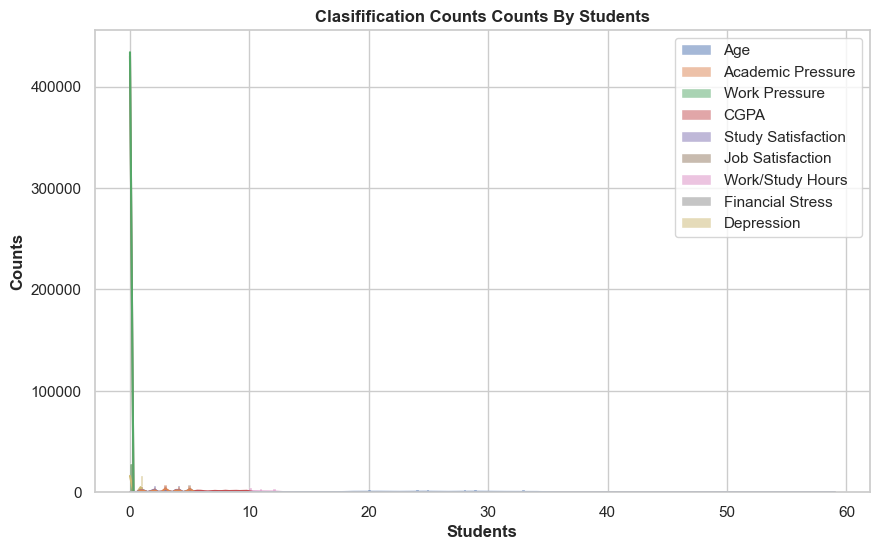

In [54]:
xf=df[df["Profession"]=="Student"]
xf.groupby("Profession")["Study Satisfaction"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.histplot(data=xf,kde=True)
plt.title("Clasifification Counts Counts By Students",fontweight="bold")
plt.xlabel("Students",fontweight="bold")
plt.ylabel("Counts",fontweight="bold")
plt.show()



In [55]:
#Alternate Visualization For Better Understanding
classifi_pro=df.groupby("Profession").agg({
    "Academic Pressure":"sum",
    "Work Pressure":"sum"
})
classifi_pro 


,Academic Pressure,Work Pressure
Profession,,
'Civil Engineer',5,0
'Content Writer',10,0
'Digital Marketer',11,0
'Educational Consultant',3,0
'UX/UI Designer',3,0
Architect,30,0
Chef,5,0
Doctor,8,0
Entrepreneur,3,0


## `Correlation Chart`

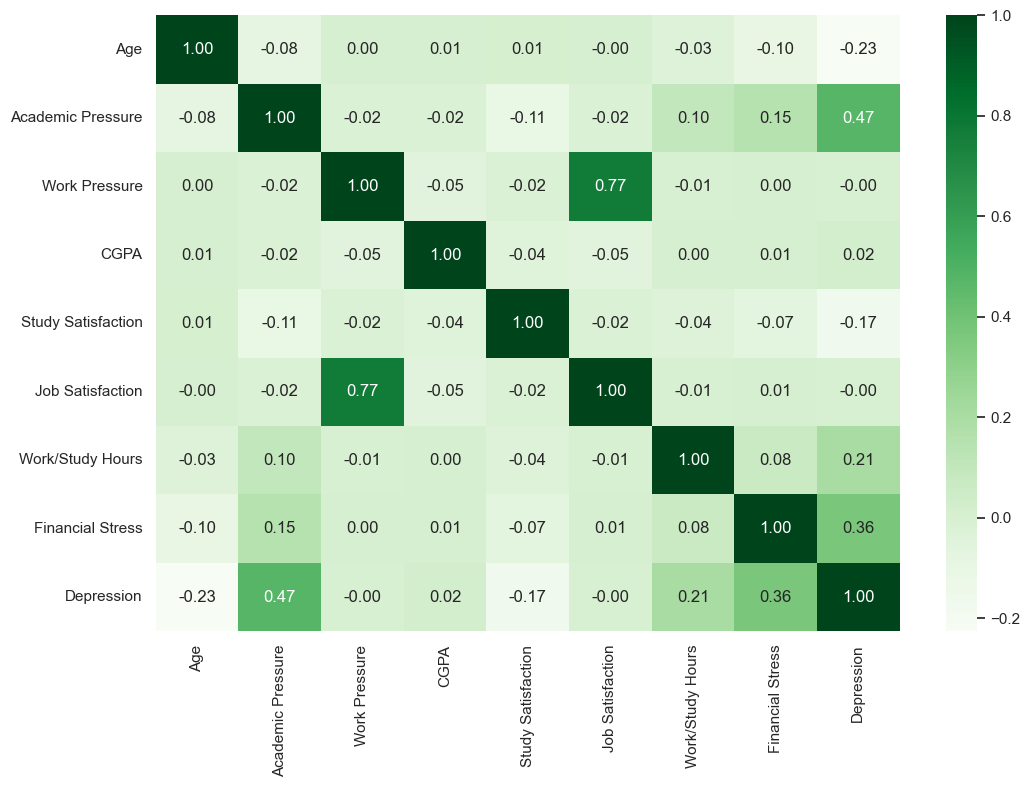

In [56]:
#Correlation Classification
classifi_corr=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(classifi_corr,annot=True,fmt=".2f",cmap="Greens")
plt.show()

In [57]:
df.rename(columns={"Have you ever had suicidal thoughts ?":"Suicidal Thoughts Occured"},inplace=True)  # Renaming Column Name 

In [58]:
suici_th=df.groupby(["Gender","Profession"])["Suicidal Thoughts Occured"].value_counts().reset_index()
suici_th.style.background_gradient(cmap="Oranges")

,Gender,Profession,Suicidal Thoughts Occured,count
0,Female,'Content Writer',Yes,1
1,Female,'Digital Marketer',No,1
2,Female,'Digital Marketer',Yes,1
3,Female,'UX/UI Designer',Yes,1
4,Female,Architect,Yes,4
5,Female,Architect,No,1
6,Female,Chef,Yes,2
7,Female,Doctor,No,1
8,Female,Entrepreneur,Yes,1
9,Female,Student,Yes,7816


### `Suicidal Thoughts Occured Based On Professions`

<Figure size 1500x1000 with 0 Axes>

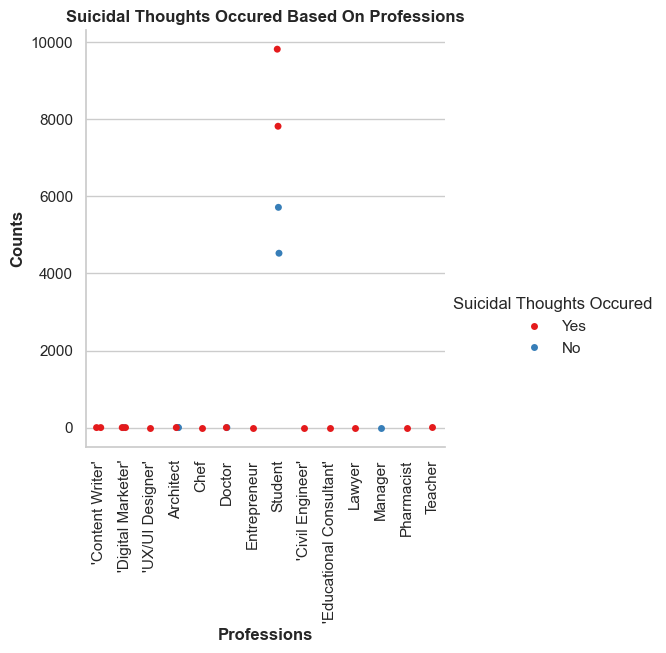

In [59]:
plt.figure(figsize=(15,10))
sns.catplot(data=suici_th,x="Profession",y="count",hue="Suicidal Thoughts Occured",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Professions",fontweight="bold",fontsize=12)
plt.ylabel("Counts",fontweight="bold",fontsize=12)
plt.title("Suicidal Thoughts Occured Based On Professions",fontweight="bold",fontsize=12)
plt.show()

### `Alternate visualization For Better Understanding`

`Suicidal Thoughts by Profession, Gender, and Response`

<Figure size 1600x1000 with 0 Axes>

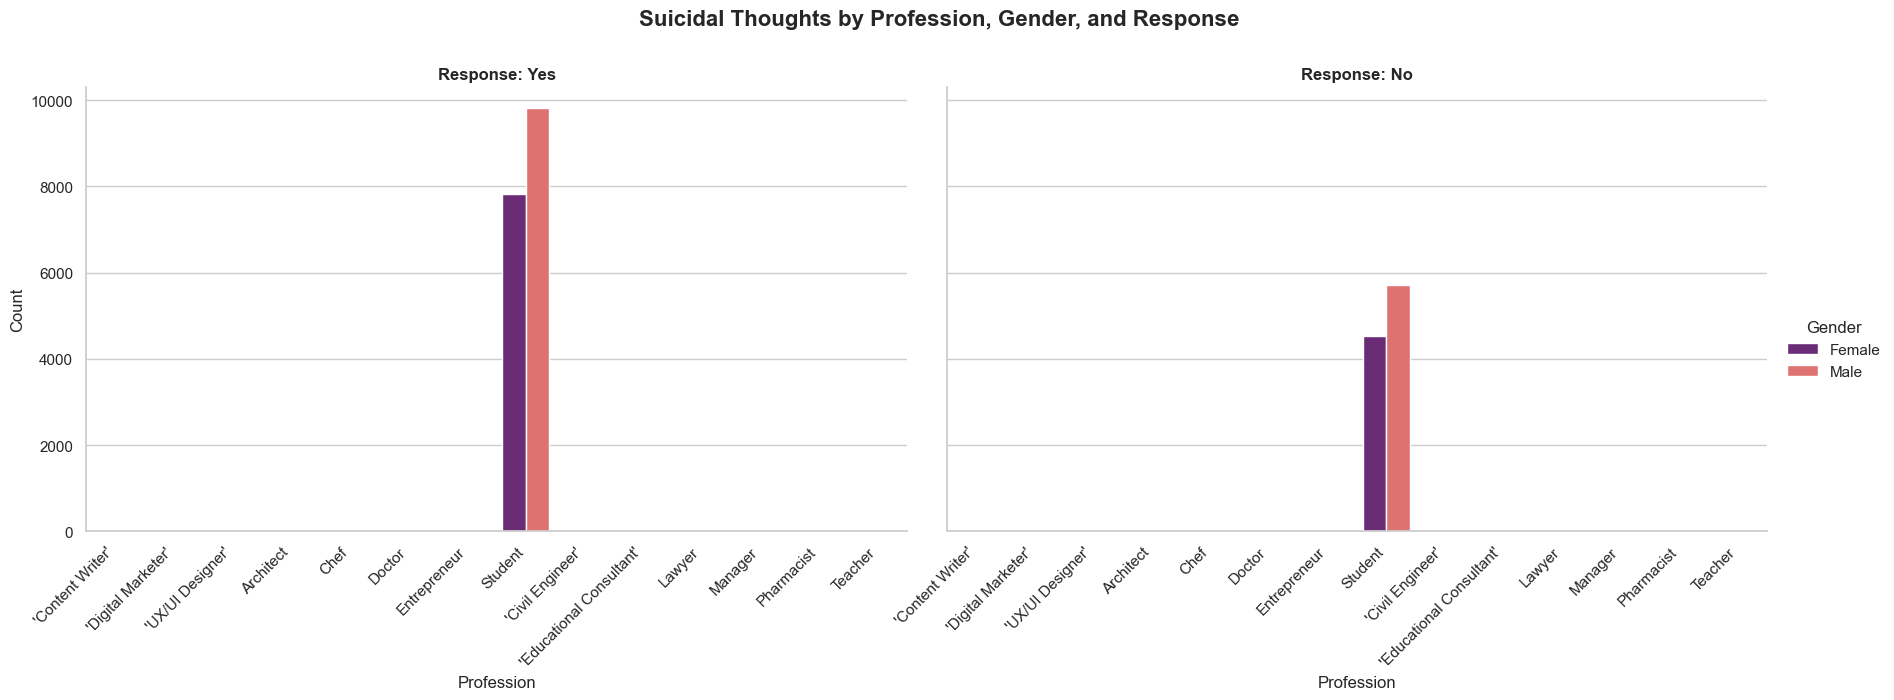

In [60]:
# Set plot size and style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Create a FacetGrid to separate plots by suicidal thoughts response (Yes/No)
g = sns.catplot(
    data=suici_th,
    kind="bar",
    x="Profession",
    y="count",
    hue="Gender",
    col="Suicidal Thoughts Occured",
    palette="magma",
    height=6,
    aspect=1.5
)

# Adjust labels
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("Profession", "Count",)
g.set_titles("Response: {col_name}",fontweight="bold",fontsize=20)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Suicidal Thoughts by Profession, Gender, and Response",fontweight="bold",fontsize=16)

plt.show()


### `Family History Of Mental Illness By Gender And Profession`

In [61]:
family_his=df.groupby(["Gender","Profession"])["Family History of Mental Illness"].value_counts().reset_index()
family_his.style.background_gradient(cmap="Reds")

,Gender,Profession,Family History of Mental Illness,count
0,Female,'Content Writer',No,1
1,Female,'Digital Marketer',No,1
2,Female,'Digital Marketer',Yes,1
3,Female,'UX/UI Designer',No,1
4,Female,Architect,Yes,4
5,Female,Architect,No,1
6,Female,Chef,No,1
7,Female,Chef,Yes,1
8,Female,Doctor,No,1
9,Female,Entrepreneur,No,1


<Figure size 1200x600 with 0 Axes>

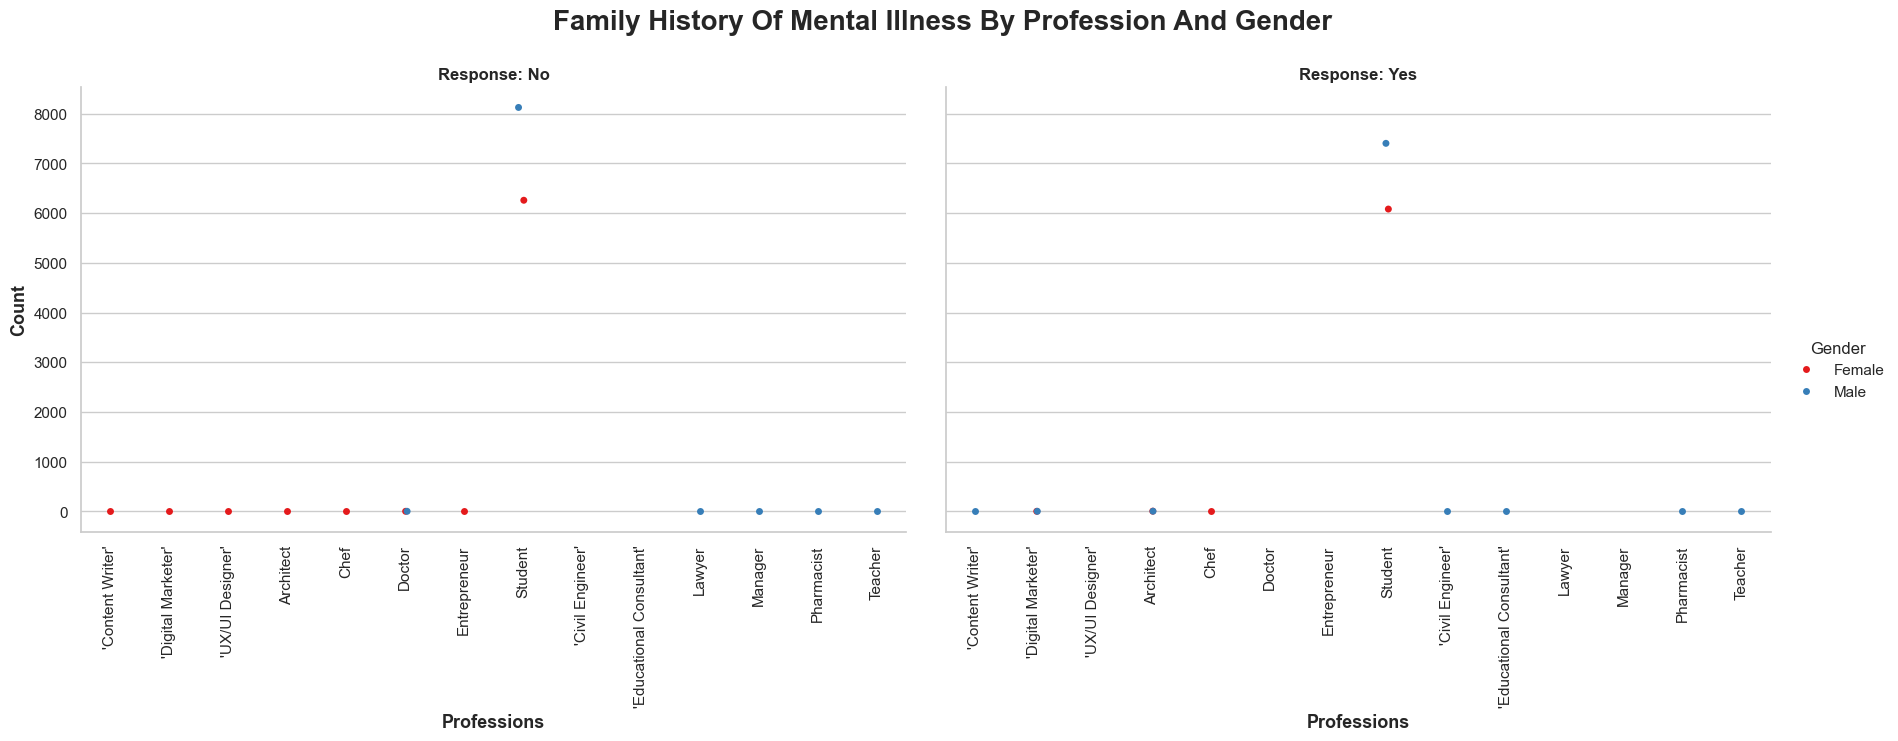

In [62]:
plt.figure(figsize=(12,6))
g=sns.catplot(
    data=family_his,
    x="Profession",
    y="count",
    hue="Gender",
    col="Family History of Mental Illness",
    palette="Set1",
    height=6,
    aspect=1.5
)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Professions","Count",fontweight="bold",fontsize=13)
g.fig.suptitle("Family History Of Mental Illness By Profession And Gender",fontweight="bold",fontsize=20)
plt.subplots_adjust(top=0.85)
g.set_titles("Response: {col_name}",fontweight="bold",fontsize=20)
plt.show()

### `Alternate Visualization`
#### Mental Illness Link By Family History And Profession

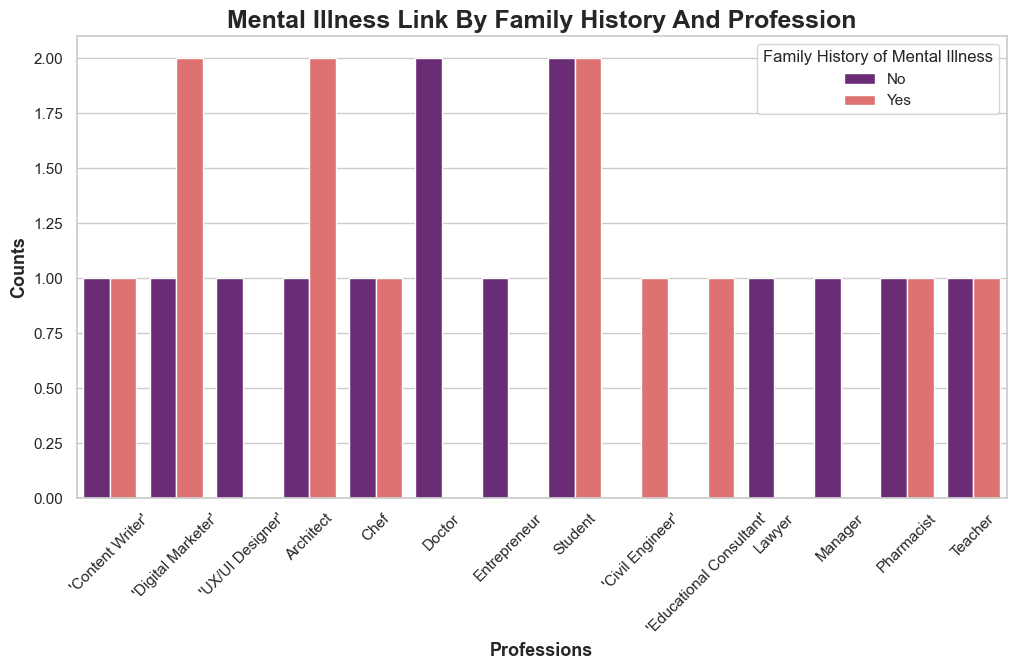

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(data=family_his, x="Profession", hue="Family History of Mental Illness", palette="magma")
plt.xticks(rotation=45)
plt.title("Mental Illness Link By Family History And Profession",fontweight="bold",fontsize=18)
plt.xlabel("Professions",fontweight="bold",fontsize=13)
plt.ylabel("Counts",fontweight="bold",fontsize=13)
plt.show()

In [64]:
df=df[df["Sleep Duration"]!="Others"] # Removing Others From Column Sleep Duration

In [65]:
sleep_qua=df.groupby("Gender")["Sleep Duration"].value_counts().reset_index()
sleep_qua.style.background_gradient(cmap="Blues")

,Gender,Sleep Duration,count
0,Female,'Less than 5 hours',3628
1,Female,'7-8 hours',3291
2,Female,'5-6 hours',2787
3,Female,'More than 8 hours',2637
4,Male,'Less than 5 hours',4681
5,Male,'7-8 hours',4055
6,Male,'More than 8 hours',3407
7,Male,'5-6 hours',3394


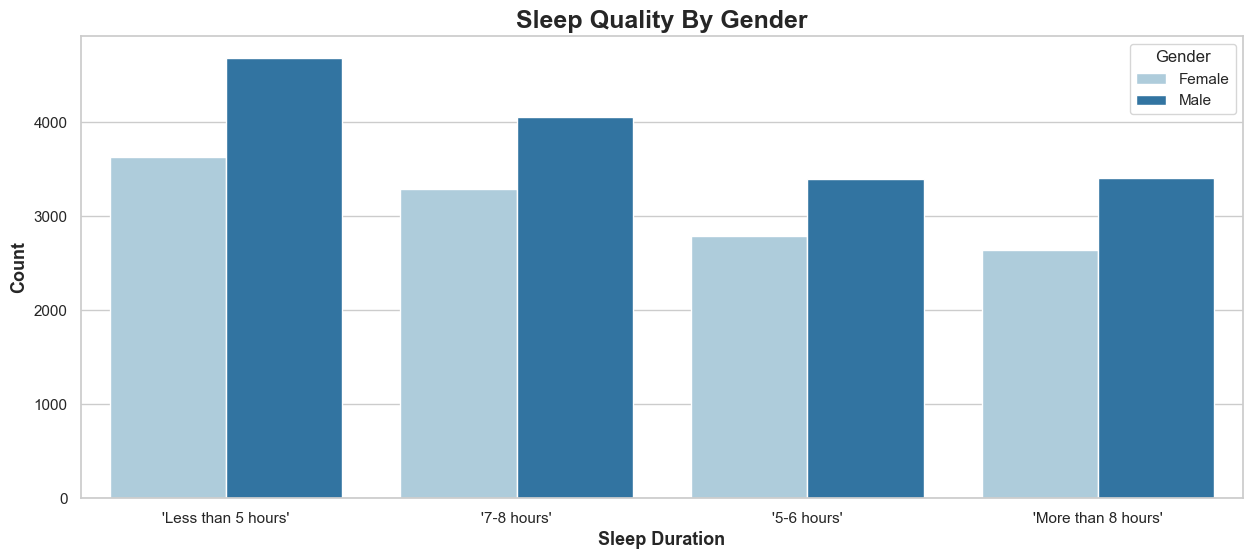

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(data=sleep_qua,x="Sleep Duration",y="count",hue="Gender",palette="Paired")
plt.title("Sleep Quality By Gender",fontweight="bold",fontsize=18)
plt.xlabel("Sleep Duration",fontweight="bold",fontsize=13)
plt.ylabel("Count",fontweight="bold",fontsize=13)
plt.show()

### ` Visualization Of Diatary Habits By Gender And Profession`

In [67]:
Dietary_Habits=df.groupby(["Gender","Profession","Dietary Habits"]).size().reset_index(name="Counts")
Dietary_Habits.style.background_gradient(cmap="Purples")

,Gender,Profession,Dietary Habits,Counts
0,Female,'Content Writer',Moderate,1
1,Female,'Digital Marketer',Healthy,1
2,Female,'Digital Marketer',Moderate,1
3,Female,'UX/UI Designer',Moderate,1
4,Female,Architect,Healthy,1
5,Female,Architect,Moderate,2
6,Female,Architect,Unhealthy,2
7,Female,Chef,Healthy,1
8,Female,Chef,Moderate,1
9,Female,Doctor,Healthy,1


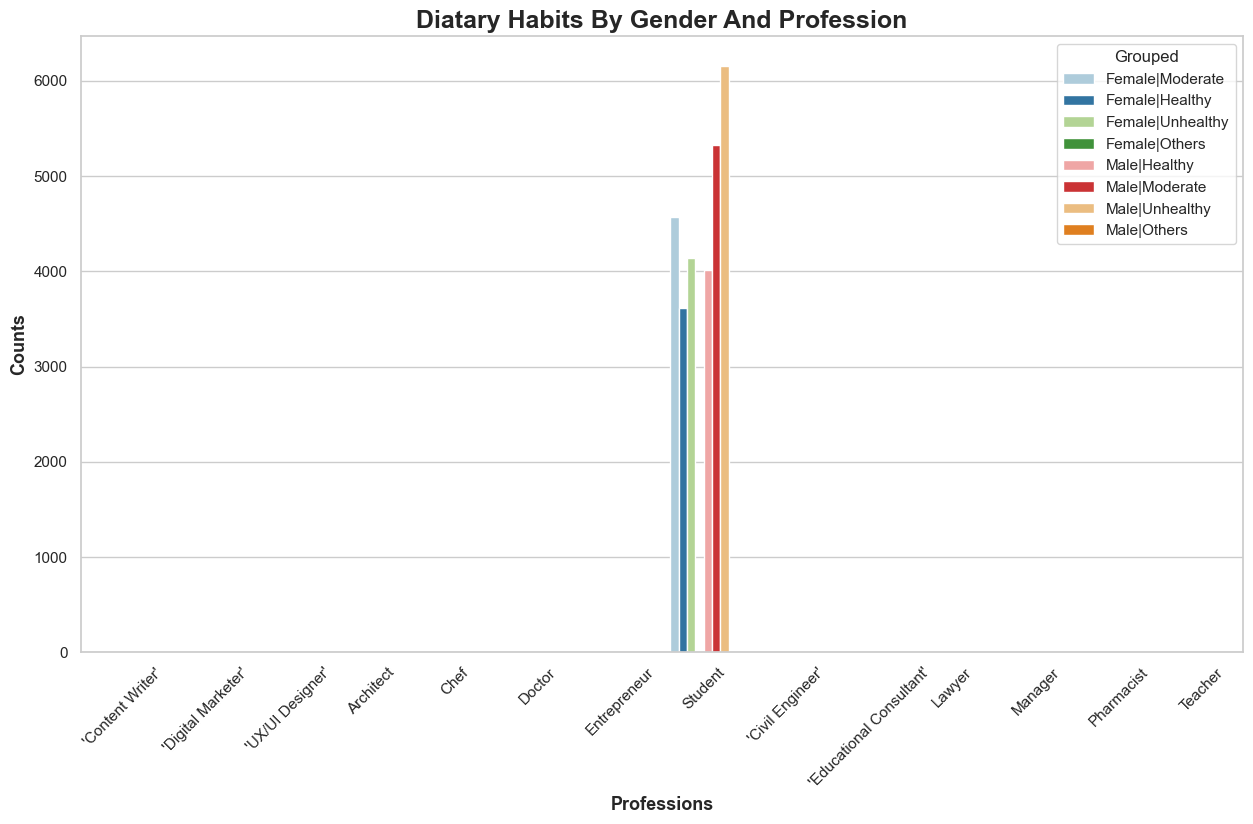

In [68]:
Dietary_Habits["Grouped"]= Dietary_Habits["Gender"]+"|"+Dietary_Habits["Dietary Habits"]
plt.figure(figsize=(15,8))
sns.barplot(data=Dietary_Habits,x="Profession",y='Counts',hue="Grouped",palette="Paired")
plt.xticks(rotation=45)
plt.xlabel("Professions",fontweight="bold",fontsize=13)
plt.ylabel("Counts",fontweight="bold",fontsize=13)
plt.title("Diatary Habits By Gender And Profession",fontweight="bold",fontsize=18)
plt.show()


### `Which City Is The Most Affected By Depression Counts`

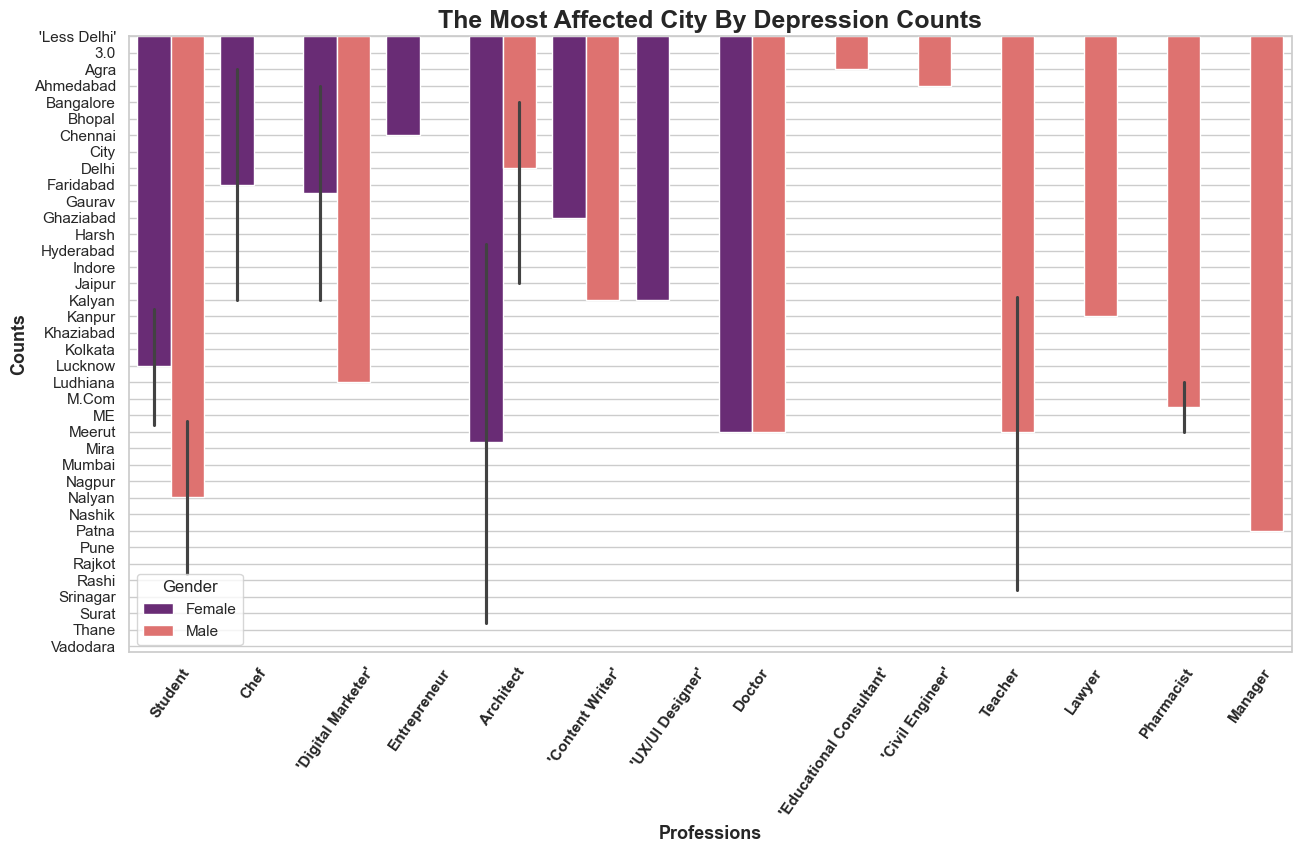

In [69]:
city_diff=df.groupby(["Gender","City","Profession"]).size().reset_index(name="Counts")
city_diff
plt.figure(figsize=(15,8))
sns.barplot(data=city_diff,x="Profession",y='City',hue="Gender",palette="magma")
plt.xticks(rotation=55,fontweight="bold")
plt.xlabel("Professions",fontweight="bold",fontsize=13)
plt.ylabel("Counts",fontweight="bold",fontsize=13)
plt.title("The Most Affected City By Depression Counts",fontweight="bold",fontsize=18)
plt.show()


### `Relation Link Between Various Factors And Depression`

In [70]:
rela_li=df.groupby(["Gender","Profession"]).agg({
    "Age":"mean",
    "Academic Pressure":"sum",
    "Work Pressure":"sum",
    "CGPA":"sum",
    "Study Satisfaction":"sum",
    "Job Satisfaction":"sum",
    "Work/Study Hours":"sum",
    "Financial Stress":"sum",
    "Depression":"sum"
}).reset_index()

rela_li.style.background_gradient(cmap="Reds")

,Gender,Profession,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,Female,'Content Writer',34.000000,5,0,6.830000,4,0.000000,5,5,1
1,Female,'Digital Marketer',24.500000,10,0,16.630000,7,0.000000,20,10,2
2,Female,'UX/UI Designer',32.000000,3,0,9.600000,2,0.000000,5,3,1
3,Female,Architect,26.000000,19,0,40.940000,18,0.000000,30,17,5
4,Female,Chef,26.000000,5,0,16.770000,7,0.000000,22,7,2
5,Female,Doctor,29.000000,3,0,6.350000,3,0.000000,12,1,1
6,Female,Entrepreneur,21.000000,3,0,8.170000,5,0.000000,4,3,1
7,Female,Student,25.769911,39150,0,93667.020000,36588,4.000000,87572,38819,7202
8,Male,'Civil Engineer',21.000000,5,0,7.830000,1,0.000000,11,3,1
9,Male,'Content Writer',25.000000,5,0,8.500000,2,0.000000,0,2,1


## **💬 Interpretation:**

- **A bar or other charts here can highlight any disparities between male and female students regarding academic pressure.**

- **If there's a significant difference, this could guide gender-specific support programs..**